In [1]:
# Basic packages
import pandas as pd
import numpy as np
import seaborn as sns



# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('C:/Users/patil/OneDrive/Documents/deppscat/eCommerce_Customer_support_data.csv')

df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:
# Basic overview
print("Shape:", df.shape)
print("Columns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Data types
df.info()

# Summary statistics
df.describe(include='all')


Shape: (85907, 20)
Columns: Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

Missing values:
 Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57151
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                   

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28756,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18232,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


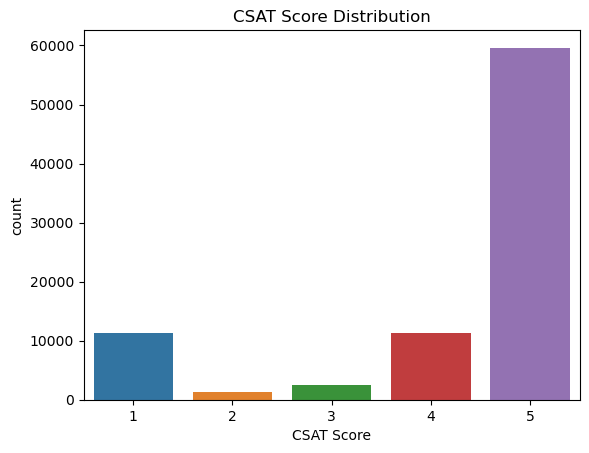

In [4]:
sns.countplot(x='CSAT Score', data=df)
plt.title("CSAT Score Distribution")
plt.show()

int64
[5 4 1 3 2]
0


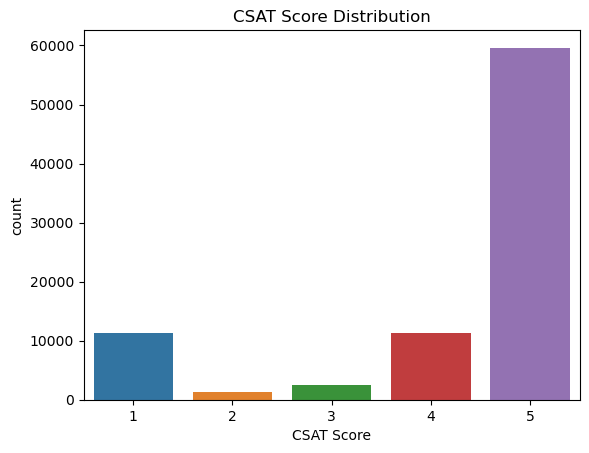

In [5]:
print(df['CSAT Score'].dtype)
df['CSAT Score'] = df['CSAT Score'].astype(int)
print(df['CSAT Score'].unique())  # Check unique values
print(df['CSAT Score'].isnull().sum())  # Check for missing values
# Fill missing values with a default value (e.g., -1 or 0)
df['CSAT Score'] = df['CSAT Score'].fillna(-1)

# Or drop rows with missing values
df = df.dropna(subset=['CSAT Score'])
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the CSAT Score distribution
sns.countplot(x='CSAT Score', data=df)
plt.title("CSAT Score Distribution")
plt.show()


In [6]:
print(df['CSAT Score'].describe())


count    85907.000000
mean         4.242157
std          1.378903
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: CSAT Score, dtype: float64


In [7]:
plt.savefig('csat_score_distribution.png')


<Figure size 640x480 with 0 Axes>

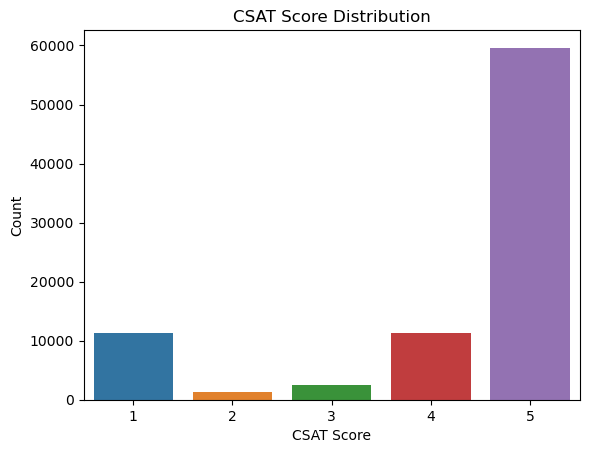

In [8]:
# Plot the CSAT Score distribution
sns.countplot(x='CSAT Score', data=df)
plt.title("CSAT Score Distribution")
plt.xlabel('CSAT Score')
plt.ylabel('Count')

# Save the figure
plt.savefig('csat_score_distribution.png')

# Show the plot
plt.show()


In [9]:
print(df.columns)  # List all column names


Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Check the first few rows after encoding
print(df.head())

# Define features and label
X = df.drop('CSAT Score', axis=1)  # Adjust column name to 'CSAT Score'
y = df['CSAT Score']  # Adjust column name to 'CSAT Score'

# Check the shape of features and labels
print(f'Features Shape: {X.shape}')
print(f'Label Shape: {y.shape}')

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first 5 scaled values
print(f'Scaled Features Sample: {X_scaled[:5]}')

# You can proceed with further steps like model training



   Unique id  channel_name  category  Sub-category  Customer Remarks  \
0      42694             2         8            19             18232   
1      59407             2         8            34             18232   
2      10706             1         5            15             18232   
3      78950             1        10            40             18232   
4      62788             1         1            22             18232   

   Order_id  order_date_time  Issue_reported at  issue_responded  \
0     51500            13766                276              306   
1     56068            13766                368              367   
2     51493            13766                771              782   
3     24227            13766                810              816   
4     61514            13766                236              240   

   Survey_response_Date  Customer_City  Product_category  Item_price  \
0                     0           1782                 9         NaN   
1             

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Load your dataset (replace with your actual DataFrame)
# df = pd.read_csv("your_file.csv")  # Uncomment and load your file here

# 2. Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# 3. Impute missing values only in numeric columns
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# 4. Combine back non-numeric columns (if needed)
df_imputed = pd.concat([df_numeric_imputed, df[non_numeric_cols].reset_index(drop=True)], axis=1)

# 5. Define features and target (assumes 'CSAT Score' is your label)
X = df_imputed.drop('CSAT Score', axis=1)

# Drop non-numeric features (like IDs or strings) before SMOTE
X = X.select_dtypes(include=['number'])

y = df_imputed['CSAT Score']

# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. Print results
print("Before SMOTE:\n", pd.Series(y_train).value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Before SMOTE:
 5.0    47683
1.0     8989
4.0     8942
3.0     2055
2.0     1056
Name: CSAT Score, dtype: int64
After SMOTE:
 5.0    47683
4.0    47683
1.0    47683
3.0    47683
2.0    47683
Name: CSAT Score, dtype: int64


In [17]:
# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6296705854964497

Classification Report:
               precision    recall  f1-score   support

         1.0       0.24      0.12      0.16      2241
         2.0       0.02      0.04      0.03       227
         3.0       0.03      0.03      0.03       503
         4.0       0.15      0.03      0.05      2277
         5.0       0.71      0.88      0.78     11934

    accuracy                           0.63     17182
   macro avg       0.23      0.22      0.21     17182
weighted avg       0.54      0.63      0.57     17182


Confusion Matrix:
 [[  264    53    77    88  1759]
 [   17     8    14     7   181]
 [   38    10    17    16   422]
 [  112    47    59    69  1990]
 [  651   214   319   289 10461]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6296705854964497
Classification Report:
               precision    recall  f1-score   support

         1.0       0.24      0.12      0.16      2241
         2.0       0.02      0.04      0.03       227
         3.0       0.03      0.03      0.03       503
         4.0       0.15      0.03      0.05      2277
         5.0       0.71      0.88      0.78     11934

    accuracy                           0.63     17182
   macro avg       0.23      0.22      0.21     17182
weighted avg       0.54      0.63      0.57     17182

Confusion Matrix:
 [[  264    53    77    88  1759]
 [   17     8    14     7   181]
 [   38    10    17    16   422]
 [  112    47    59    69  1990]
 [  651   214   319   289 10461]]
